# Exporting and plotting fitbit data

In [1]:
# This is a python file you need to have in the same directory as your code so you can import it
import gather_keys_oauth2 as Oauth2
import fitbit
import pandas as pd
import datetime
import os
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your credentials
load_dotenv(find_dotenv())

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

In [3]:
server=Oauth2.OAuth2Server(CLIENT_ID,
                           CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,
                           CLIENT_SECRET,
                           oauth2=True,
                           access_token=ACCESS_TOKEN,
                           refresh_token=REFRESH_TOKEN)

[13/Oct/2021:18:34:36] ENGINE Listening for SIGTERM.
[13/Oct/2021:18:34:36] ENGINE Listening for SIGHUP.
[13/Oct/2021:18:34:36] ENGINE Listening for SIGUSR1.
[13/Oct/2021:18:34:36] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[13/Oct/2021:18:34:36] ENGINE Started monitor thread 'Autoreloader'.
[13/Oct/2021:18:34:36] ENGINE Serving on http://127.0.0.1:8080
[13/Oct/2021:18:34:36] ENGINE Bus STARTED


127.0.0.1 - - [13/Oct/2021:18:34:48] "GET /?code=9a3535cd24b0c347ad6312d4aef03a2b93b7ecc2&state=QUQrnK9zDaY0o19nGu3h1RguVmXIQR HTTP/1.1" 200 122 "" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15"


[13/Oct/2021:18:34:49] ENGINE Bus STOPPING
[13/Oct/2021:18:34:54] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[13/Oct/2021:18:34:54] ENGINE Stopped thread 'Autoreloader'.
[13/Oct/2021:18:34:54] ENGINE Bus STOPPED
[13/Oct/2021:18:34:54] ENGINE Bus EXITING
[13/Oct/2021:18:34:54] ENGINE Bus EXITED
[13/Oct/2021:18:34:54] ENGINE Waiting for child threads to terminate...


## Export data from API
#### Options:
__Activity__
- activities/calories
- activities/caloriesBMR
- activities/steps
- activities/distance
- activities/floors
- activities/elevation
- activities/minutesSedentary
- activities/minutesLightlyActive
- activities/minutesFairlyActive
- activities/minutesVeryActive
- activities/activityCalories </br>

__Tracker Activity__
- activities/tracker/calories
- activities/tracker/steps
- activities/tracker/distance
- activities/tracker/floors
- activities/tracker/elevation
- activities/tracker/minutesSedentary
- activities/tracker/minutesLightlyActive
- activities/tracker/minutesFairlyActive
- activities/tracker/minutesVeryActive
- activities/tracker/activityCalories

In [102]:
# This is the date of data that I want.
# You will need to modify for the date you want
# oneDate = pd.datetime(year = 2021, month = 1, day = 21)
oneDate = datetime.datetime.now().date() - datetime.timedelta(6)
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')

HTTPTooManyRequests: Too Many Requests

In [5]:
oneDate

datetime.date(2021, 10, 7)

In [6]:
df = pd.DataFrame(oneDayData["activities-heart-intraday"]["dataset"])
df = df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))

display(df.head()), df.shape

,time,value
0,2021-10-07 00:00:03,61
1,2021-10-07 00:00:08,60
2,2021-10-07 00:00:18,61
3,2021-10-07 00:00:23,60
4,2021-10-07 00:00:28,59


(None, (10663, 2))

## Today's heart rate data

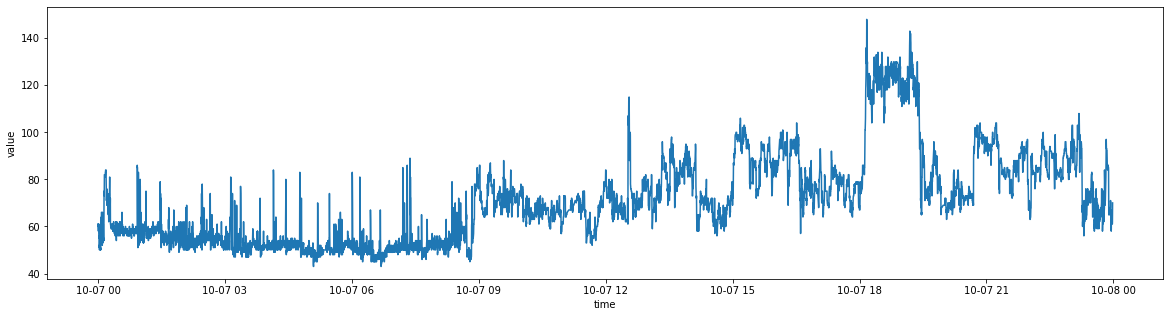

In [7]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [8]:
oneDayData = auth2_client.intraday_time_series('activities/steps', oneDate, detail_level='1min')

In [9]:
df = pd.DataFrame(oneDayData["activities-steps-intraday"]["dataset"])
df = df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))

display(df.head()), df.shape

,time,value
0,2021-10-07 00:00:00,0
1,2021-10-07 00:01:00,0
2,2021-10-07 00:02:00,0
3,2021-10-07 00:03:00,0
4,2021-10-07 00:04:00,0


(None, (1440, 2))

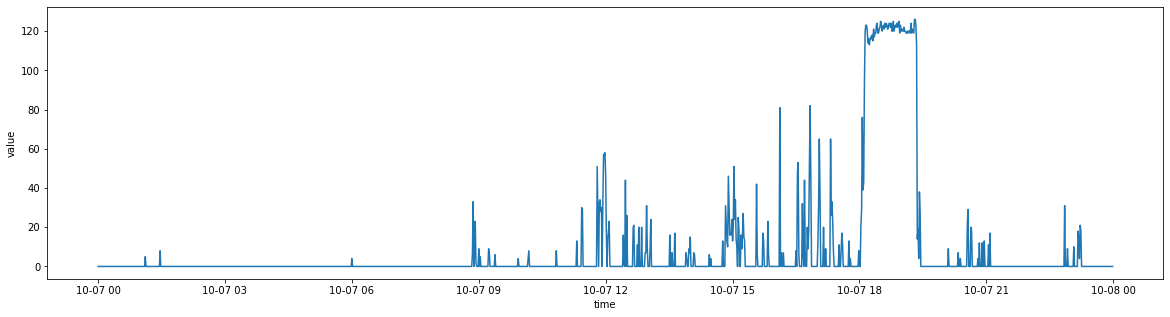

In [10]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [11]:
oneDayData = auth2_client.intraday_time_series('activities/distance', oneDate, detail_level='1min')

In [12]:
df = pd.DataFrame(oneDayData["activities-distance-intraday"]["dataset"])
df = (df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))
      .assign(value = lambda x: x["value"].cumsum())
     )

display(df.head()), df.shape

,time,value
0,2021-10-07 00:00:00,0.0
1,2021-10-07 00:01:00,0.0
2,2021-10-07 00:02:00,0.0
3,2021-10-07 00:03:00,0.0
4,2021-10-07 00:04:00,0.0


(None, (1440, 2))

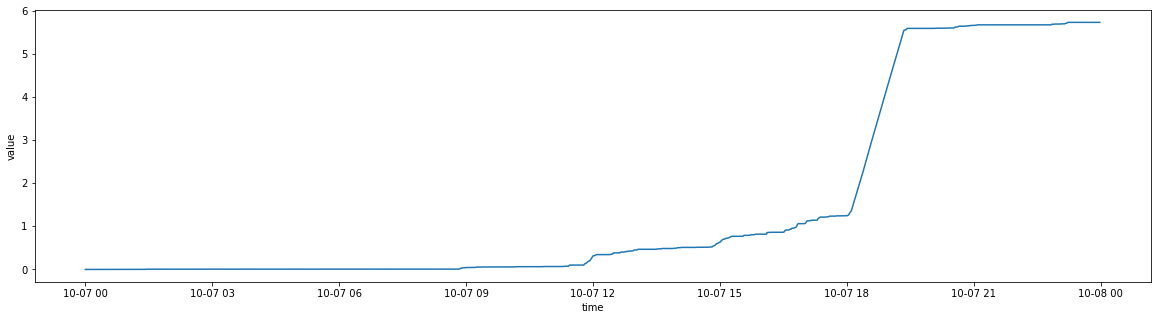

In [13]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [14]:
oneDayData = auth2_client.sleep(oneDate)

In [15]:
df = pd.DataFrame(oneDayData["sleep"][0]["minuteData"])
df = (df.assign(dateTime = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["dateTime"]))
#       .assign(value = lambda x: x["value"].cumsum())
     )

display(df.head()), df.shape

,dateTime,value
0,2021-10-07 00:14:00,3
1,2021-10-07 00:15:00,3
2,2021-10-07 00:16:00,2
3,2021-10-07 00:17:00,2
4,2021-10-07 00:18:00,1


(None, (517, 2))

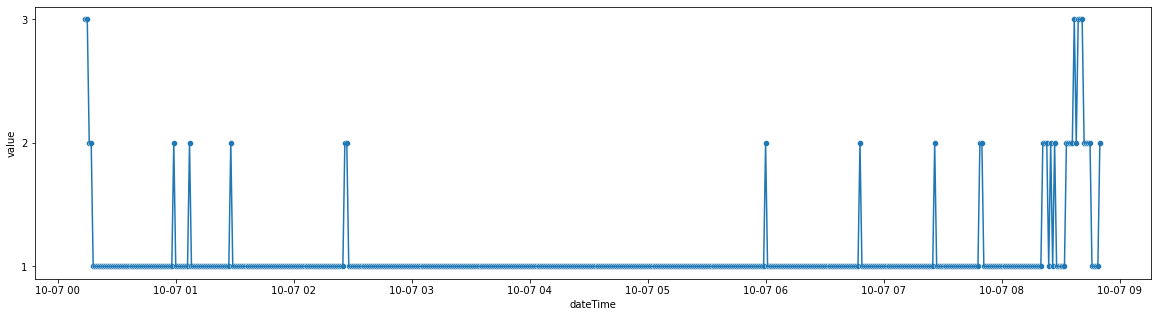

In [16]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="dateTime",
                 y="value"
                 )
_ = sns.scatterplot(data=df,
                 x="dateTime",
                 y="value"
                 )

In [22]:
str(datetime.datetime.now())

'2021-10-13 19:51:07.751441'

In [35]:
data_list = pd.date_range(start='1/1/2021', end=str(datetime.datetime.now())).astype(str).tolist()

In [39]:
data_list[-1]

'2021-10-13'

In [49]:
# auth2_client.activities()

In [50]:
# dir(fitbit.Fitbit)

In [51]:
monthDiffDate = datetime.datetime.now().date() - datetime.timedelta(30)

In [52]:
date_choice_list = pd.date_range(start=str(monthDiffDate), end=str(datetime.datetime.now())).astype(str).tolist()[:-1]

In [87]:
dfs_list = list()
day_number = 1
for oneDate in date_choice_list:
    oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1min')
    df = pd.DataFrame(oneDayData["activities-heart-intraday"]["dataset"])
    df = (df
          .assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))
          .rename(columns={"value": f"day_number_{day_number}_value"})
           .assign(hour=lambda d: d["time"].dt.hour)
         .assign(minute=lambda d: d["time"].dt.minute)
         .drop("time", axis=1)
          .set_index(["hour", "minute"])
         )
    dfs_list.append(df)
    day_number += 1

In [88]:
tmp_df = pd.concat(dfs_list, axis=1)

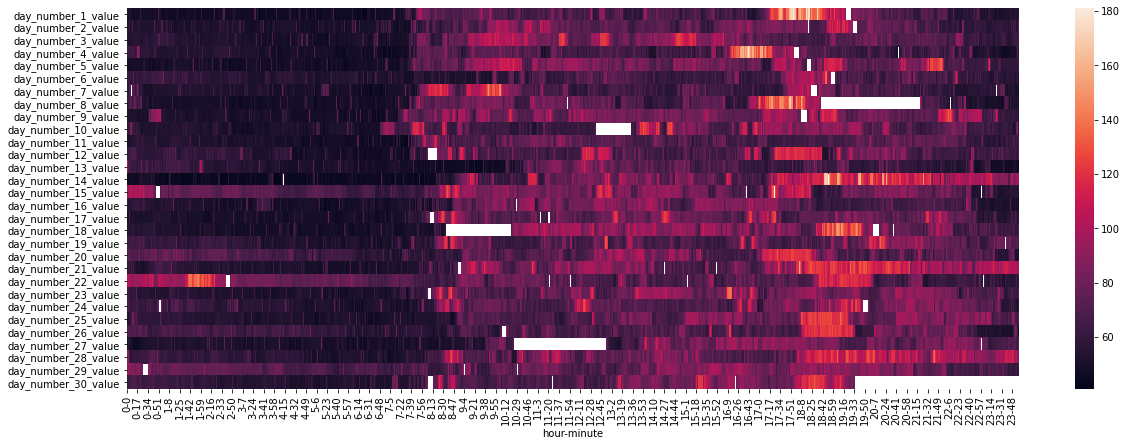

In [89]:
_ = plt.figure(figsize=(20, 7))
_ = sns.heatmap(tmp_df.T)

In [99]:
tmp_df.index = [str(x).replace(", ", "-").replace("(", "").replace(")", "") for x in tmp_df.index.values]

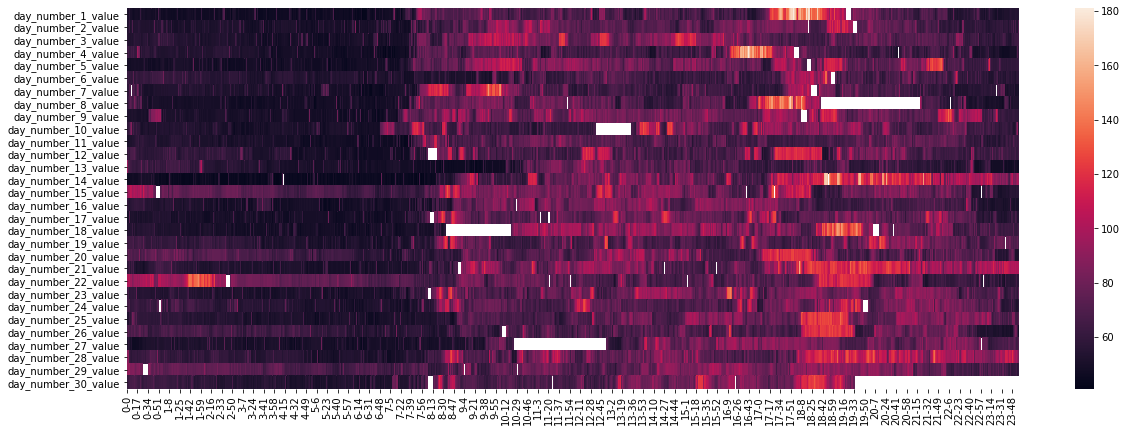

In [101]:
_ = plt.figure(figsize=(20, 7))
_ = sns.heatmap(tmp_df.T)